# 선형 회귀 모델을 활용한 중고차 가격 예측


In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family = 'Malgun Gothic')

# 1. Data Load

**데이터 설명**

| 변수 명           | 설명                                    |
| ----------------- | --------------------------------------- |
| Year              | 출고년도                                |
| Kilometers_Driven | 주행거리                                |
| Fuel_Type         | 연료 타입                               |
| Owner_Type        | 해당 차량의 주인이 몇 번째 주인이었는지 |
| Mileage           | 연비                                    |
| Engine            | 배기량                                  |
| Power             | 마력                                    |
| Seats             | 좌석 수                                 |
| New_Price         | 해당 차종의 신차 가격                   |
| Maker         | 해당 차종의 제조사                   |
| Price         | 가격                   |



In [ ]:
df = pd.read_csv('car.csv')

df

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan,3.50
...,...,...,...,...,...,...,...,...,...,...,...
5553,2014,27365,Diesel,First,28.40,1248,74.00,5.0,7.88,Maruti,4.75
5554,2015,100000,Diesel,First,24.40,1120,71.00,5.0,NaN,Hyundai,4.00
5555,2012,55000,Diesel,Second,14.00,2498,112.00,8.0,NaN,Mahindra,2.90
5556,2013,46000,Petrol,First,18.90,998,67.10,5.0,NaN,Maruti,2.65


# 2. Data Preprocess

## 2-1. 결측치 처리

In [ ]:
df.isnull()  #isnull() : 데이터 프레임 내에 결측치가 존재하는 위치에 True 리턴

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5553,False,False,False,False,False,False,False,False,False,False,False
5554,False,False,False,False,False,False,False,False,True,False,False
5555,False,False,False,False,False,False,False,False,True,False,False
5556,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.isnull().sum() # 칼럼 별 결측치의 개수 출력

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   2
New_Price            4785
Maker                   0
Price                   0
dtype: int64

In [ ]:
# 결측치 처리 방법
# option1: 칼럼 자체 제거(열 제거)
# option2: 칼럼은 유지하되 결측 값이 존재하는 행만 제거

#칼럼 제거
df = df.drop(['New_Price'], axis = 1) #axis=1 옵션 설정 시, 해당 칼럼 제거

df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                2
Maker                0
Price                0
dtype: int64

In [ ]:
#결측 행 탐색
df.loc[df['Seats'].isnull() == True, :]

print('Seats 데이터가 결측치인 데이터의 행은', df.loc[df['Seats'].isnull() == True, :].index.tolist(), '입니다.')

Seats 데이터가 결측치인 데이터의 행은 [218, 1852] 입니다.


In [ ]:
#결측 행 제거(아래 코드 약간 수정)
df = df.drop(df.loc[df['Seats'].isnull() == True, :].index).reset_index(drop=True)

df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Maker                0
Price                0
dtype: int64

## 2-2. 데이터 타입 변환
* 데이터 분석을 위해서는 분석에 적절한 형태의 데이터 형태로 변환할 필요가 있음

In [ ]:
# 칼럼 별 데이터 타입 확인
print(df.dtypes)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Maker                 object
Price                float64
dtype: object


In [ ]:
#범주형 데이터 타입 변환
df['Year'] = df['Year'].astype('object')

print(df.dtypes)

Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Maker                 object
Price                float64
dtype: object


#2-3 Train / Test data 분리

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.8)
train = train.reset_index(drop=True) #reset_index(): 데이터프레임의 인덱스를 0부터 재정렬(drop = True : 기존 인덱스는 보존하지 않고 삭제)
test = test.reset_index(drop=True)
print(len(train))
print(len(test))

4444
1112


In [ ]:
# 분석을 위해 수치형 변수만 사용
# 데이터 타입이 object가 아닌 것들만 추출
#인덱스는 컬럼 이름과 동일하므로, 인덱스를 리스트 형태로 출력

train.dtypes[np.where(train.dtypes!='object')[0]]

Kilometers_Driven      int64
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [ ]:
Newcol = train.dtypes[np.where(train.dtypes!='object')[0]].index.tolist()
Newcol

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [ ]:
# 수치형 변수 칼럼 추출
train = train[Newcol]
test = test[Newcol]

train

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,107023,22.07,1199,73.90,5.0,3.90
1,35000,19.40,1198,86.80,5.0,2.85
2,105000,15.96,2523,62.10,7.0,6.00
3,59450,18.60,1197,81.86,5.0,7.53
4,90000,11.00,2993,235.00,5.0,17.75
...,...,...,...,...,...,...
4439,52895,17.30,1998,163.70,5.0,6.02
4440,41284,20.00,1399,68.05,5.0,2.50
4441,63455,11.50,2982,171.00,7.0,19.00
4442,36000,12.55,2982,168.70,7.0,21.50


#3. 탐색적 데이터 분석(Exploratory Data Analysis, EDA) 

##3-1. 상관계수 확인

In [ ]:
train.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Kilometers_Driven,1.000000,-0.138868,0.162187,0.010923,0.207988,-0.163654
Mileage,-0.138868,1.000000,-0.640832,-0.543362,-0.333477,-0.348369
Engine,0.162187,-0.640832,1.000000,0.872066,0.402238,0.664678
Power,0.010923,-0.543362,0.872066,1.000000,0.112902,0.773226
Seats,0.207988,-0.333477,0.402238,0.112902,1.000000,0.073778
Price,-0.163654,-0.348369,0.664678,0.773226,0.073778,1.000000


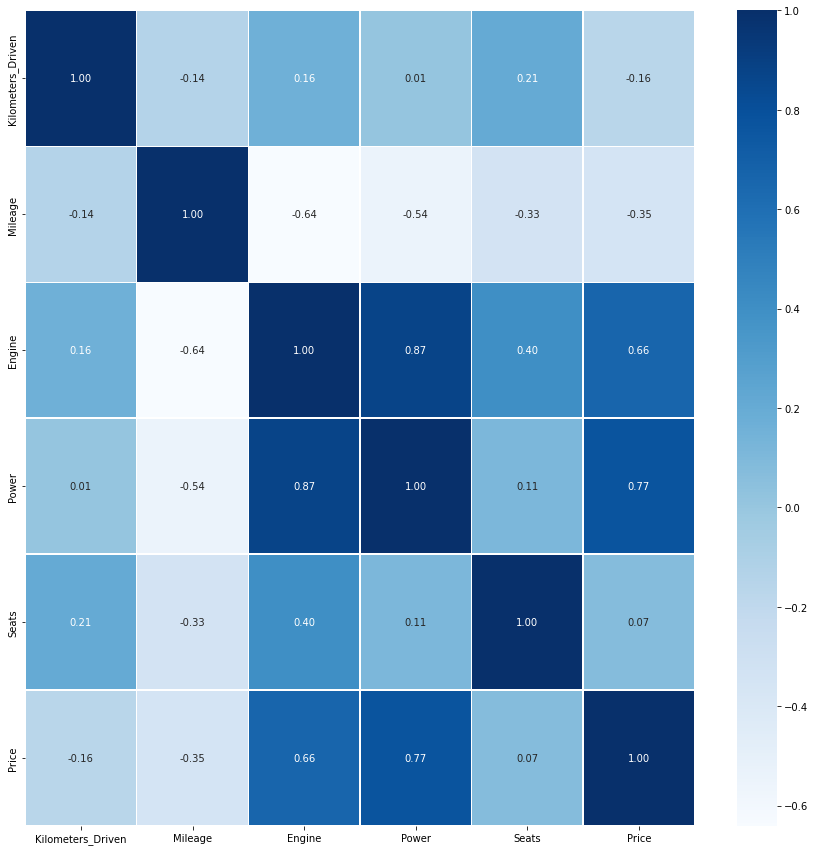

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues') 

#annot = True: 셀 내에 수치 표현 여부 
#fmt = '.2f': 수치 표현 시 자릿수 설정
#linewidths = 5: 선굵기
#camp: 컬러 설정

In [ ]:
# 예측 목표인 Price와 상관관계가 높은 변수: Power, Engine 
# 양수, 음수로 나누는 것이 아닌, 절대값으로 확인해야 함
#(예를 들어, -0.9는 음의 상관관계로, 상관계수가 높다고 할 수 있음)
train.corr()['Price']

Kilometers_Driven   -0.163654
Mileage             -0.348369
Engine               0.664678
Power                0.773226
Seats                0.073778
Price                1.000000
Name: Price, dtype: float64

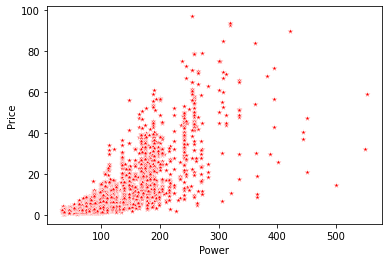

In [ ]:
# 변수 간 관계 시각화
sns.scatterplot(x = train['Power'], y = train['Price'], color = 'red', marker = '*')

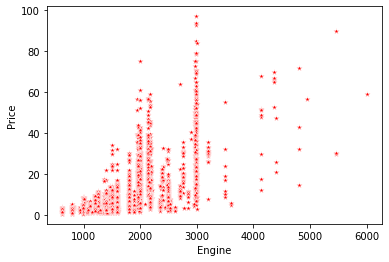

In [ ]:
sns.scatterplot(x = train['Engine'], y = train['Price'], color = 'red', marker = '*')

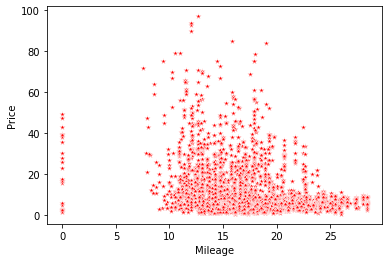

In [ ]:
sns.scatterplot(x = train['Mileage'], y = train['Price'], color = 'red', marker = '*')

#0이라는 수치가 보이나, 이번 수업에서는 자세하게 고려하지 않음

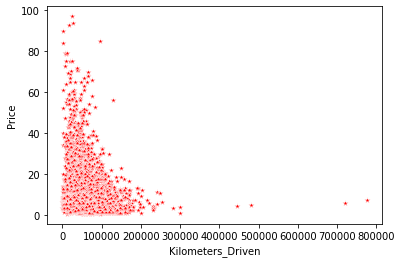

In [ ]:
sns.scatterplot(x = train['Kilometers_Driven'], y = train['Price'], color = 'red', marker = '*')
#통계적으로 이상치라 판단할 수 있는 수치가 있으나, 이번 수업에서는 처리하지 않음

In [ ]:
col = ['Engine', 'Price']

train = train[col]
test = test[col]

train

,Engine,Price
0,1199,3.90
1,1198,2.85
2,2523,6.00
3,1197,7.53
4,2993,17.75
...,...,...
4439,1998,6.02
4440,1399,2.50
4441,2982,19.00
4442,2982,21.50


In [ ]:
col.remove('Price')

#4. 선형 회귀 모델 구축

##4-1. 변수 분리

In [ ]:
trainY = train['Price'].to_numpy()
trainX = train[col].to_numpy()

testY = test['Price'].to_numpy()
testX = test[col].to_numpy()
trainX

array([[1199],
       [1198],
       [2523],
       ...,
       [2982],
       [2982],
       [1197]])

In [ ]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

print(trainX)

[[0.10699665]
 [0.10681057]
 [0.35336807]
 ...
 [0.43877931]
 [0.43877931]
 [0.10662449]]


In [ ]:
scaler

MinMaxScaler()

In [ ]:
#Modeling: 모델 구축을 위한 알고리즘 적용 단계

model = LinearRegression(fit_intercept = False, normalize = True)
#fit_intercept = X 데이터에 상수항인 Y절편을 포함시켰는가? No, 즉 Y절편은 계산하지 않음
#normalize = X 데이터를 정규화 하였는가? Yes

In [ ]:
model.fit(trainX, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

#5. 모델 평가

In [ ]:
List = list()

for i in zip(col, model.coef_):
  List.append(i)

print(List)

[('Engine', 55.292450254156385)]


* 추정한 회귀 계수 및 변수 명을 추출하는 반복문 작성

In [ ]:
#추정한 회귀계수 출력
pd.DataFrame(List, columns = ['Columns', 'Coeff'])

,Columns,Coeff
0,Engine,55.29245


In [ ]:
#Y절편 출력(계산되지 않는 것으로 정했으므로, 0)
print(model.intercept_)

0.0


In [ ]:
from sklearn.metrics import mean_squared_error

train_predict = model.predict(trainX)
compare = pd.concat([pd.DataFrame(abs(train_predict)), pd.DataFrame(trainY)], axis = 1)
print(compare)
#왼쪽: 학습 데이터의 예측값, 오른쪽: 학습 데이터의 실제값

              0      0
0      5.916107   3.90
1      5.905818   2.85
2     19.538586   6.00
3      5.895529   7.53
4     24.374361  17.75
...         ...    ...
4439  14.136923   6.02
4440   7.973883   2.50
4441  24.261183  19.00
4442  24.261183  21.50
4443   5.895529   7.29

[4444 rows x 2 columns]


In [ ]:
#mean_squared_error(train_predict, trainY)
#출력값: 평균 제곱 오차

print('학습용 데이터셋의 평균 제곱 오차: {}'.format(round(mean_squared_error(train_predict, trainY), 2)))

학습용 데이터셋의 평균 제곱 오차: 71.23


In [ ]:
test_predict = model.predict(testX)
compare = pd.concat([pd.DataFrame(abs(test_predict)), pd.DataFrame(testY)], axis = 1)
compare.columns = ['Predict', 'Real']
print(compare)

        Predict   Real
0      4.725634   1.11
1     17.323115  15.50
2     12.306866   4.29
3     19.648026   6.10
4      2.400723   2.25
...         ...    ...
1107  11.043328   6.25
1108   7.884481   4.75
1109  11.043328  12.90
1110  23.678714   9.66
1111  17.361021  35.00

[1112 rows x 2 columns]


In [ ]:
print('테스트 데이터셋의 평균 제곱 오차: {}'.format(round(mean_squared_error(test_predict, testY), 2)))

테스트 데이터셋의 평균 제곱 오차: 92.24


(0.0, 70.0)

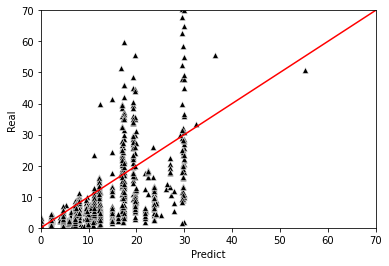

In [ ]:
# 결과 시각화

import seaborn as sns

sns.scatterplot(x = compare['Predict'], y = compare['Real'], marker = '^', color = 'black')

plt.plot([0, 70], [0, 70], color = 'red')
plt.xlim([0, 70]) #x축 표현 범위
plt.ylim([0, 70]) #y축 표현 범위

In [ ]:
print('학습용 데이터셋의 R-square: {}'.format(model.score(trainX, trainY)))
print('테스트 데이터셋의 R-square: {}'.format(model.score(testX, testY)))

학습용 데이터셋의 R-square: 0.4271754576862449
테스트 데이터셋의 R-square: 0.28178509753395364


In [ ]:
compare['Residual'] = compare['Real'] - compare['Predict']

In [ ]:
compare

,Predict,Real,Residual
0,4.725634,1.11,-3.615634
1,17.323115,15.50,-1.823115
2,12.306866,4.29,-8.016866
3,19.648026,6.10,-13.548026
4,2.400723,2.25,-0.150723
...,...,...,...
1107,11.043328,6.25,-4.793328
1108,7.884481,4.75,-3.134481
1109,11.043328,12.90,1.856672
1110,23.678714,9.66,-14.018714


Text(0.5, 1.0, 'Box Plot')

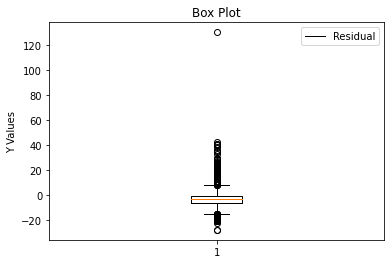

In [ ]:
#잔차 시각화

plt.boxplot(compare['Residual'])#잔차를 matplotlib 라이브러리를 활용하여 그리는 함수
plt.legend(['Residual'])
plt.ylabel('Y Values')
plt.title('Box Plot')

#대칭 형태의 분포를 가짐

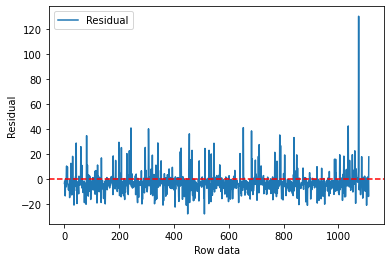

In [ ]:
plt.plot(compare['Residual'])
plt.legend(['Residual'])

plt.xlabel('Row data')
plt.ylabel('Residual')
plt.axhline(0, color = 'red', linestyle = '--')

* 정규성 검정 방법(참고)

시각적으로 검정하는 방법: QQ Plot(Quantile-Quantile Plot)

사용 이유: 두 확률변수의 분포를 확인해보자(사분위수를 활용하여)

1분위수: 전체 데이터의 25% 시점의 데이터

2분위수: 전체 데이터의 중앙값

3분위수: 전체 데이터의 75% 시점의 데이터



**여기서 활용한 것: 두 확률변수의 분포를 확인하는 것인데, 하나는 '잔차'의 확률변수이고, 다른 하나는 '정규'분포**


x는 잔차를 표준 정규분포로 표현했을 때의 분위수 데이터

y는 잔차 데이터


즉, x는 잔차가 표준 정규분포를 따른다고 가정했을 때, 분위수에 대한 값
그리고, y는 실제 잔차 값

두 값에 대한 분포를 시각화 하는 방법이 QQ plot이고, 완전 분포가 동일하다면 빨간색 선의 모양을 띔

선의 모양을 가짐-> 회귀분석의 기본 가정 중 하나인 정규성을 만족한다고 할 수 있음
잔차가 정규성, 즉 정규 분포를 따른다.

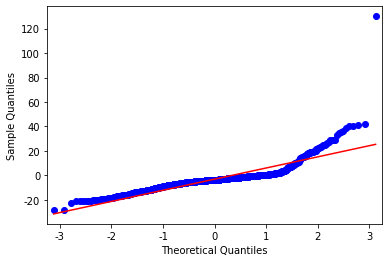

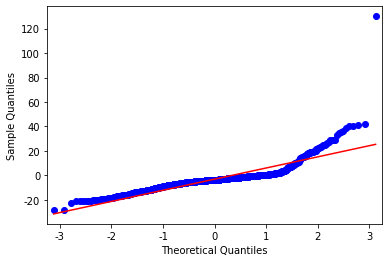

In [ ]:
import statsmodels.api as sm

model_residuals = compare['Residual']
#model_residuals 라는 변수에 '잔차 값' 할당
plt.rcParams['axes.unicode_minus'] = False
sm.ProbPlot(model_residuals).qqplot(line = 's')

Text(0, 0.5, 'Count')

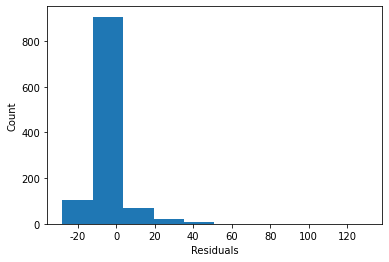

In [ ]:
plt.hist(model_residuals.values)
plt.xlabel('Residuals')
plt.ylabel('Count')

#잔차의 분포
#정규 분포의 형태를 띔

#####Power 변수만 사용하였을 때, 모델의 성능이 감소하였음

#####조합할 수 있는 변수의 종류는 여러가지인데, 과연 어떤 변수를 조합해야 가장 좋은 모델이 될 것인가?

######변수를 선택하는 방법은 중요한 문제임